** Plotting a Randome Plot **

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [25]:
x = np.random.randint(0, 30, 10)
y = np.random.randint(0, 55, 10)

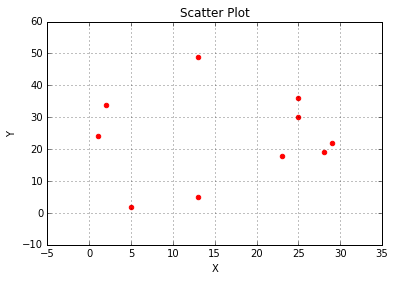

In [32]:
plt.figure()
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y, color='red')
plt.grid(True, color='0')
plt.autoscale(True)
plt.show()

In [2]:
# import
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
# generating some nos
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

** Plotting**

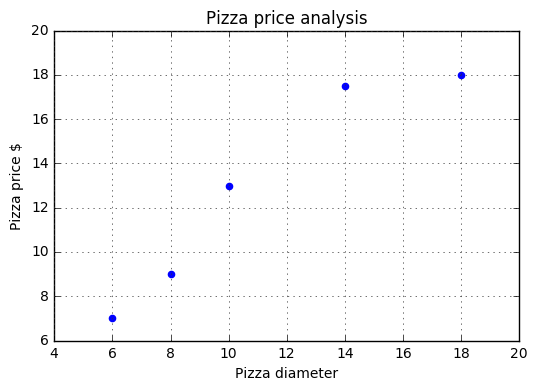

In [36]:
# creating figure
plt.figure(figsize=(6, 4), dpi=120)
#plt.plot(x, Y, color='blue')
plt.scatter(X, y, color='blue')
plt.xlabel("Pizza diameter")
plt.ylabel("Pizza price $")
plt.title("Pizza price analysis")
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.grid(True, color='0.2')
plt.autoscale(True)

** Using linear Regression to predict the pizza price **

In [50]:
from sklearn.linear_model import LinearRegression

lReg = LinearRegression()
lReg.fit(X, y)

# predict the price of 16" pizza
print("16' pizza price : ", lReg.predict([16])[0])

# getting coefficeint & intercept
print("Coeff : ", lReg.coef_, 
     "\nIntercept : ", lReg.intercept_)


16' pizza price :  [ 17.58620708]
Coeff :  [[ 0.9762931]] 
Intercept :  [ 1.96551743]


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Checking RSS - mean([y-f(x)]**2)

In [53]:
rss = np.mean((y-lReg.predict(X))**2)
rss  # also called cost func

1.7495689655172761

** Calculating variance of X and co-variance of X and y **

In [60]:
xm = np.mean(X)
print(xm)

variance = (np.sum((X - xm)**2))/4
print(variance)

# numpy func np.var
print(np.var(X, ddof=1))  #ddof - bessels corelation

11.2
23.2
23.2


In [76]:
ym = np.mean(y)
print(ym)

covar = np.sum((X-xm)*(y-ym))/4
print(covar)

# numpy func np.cov
print(np.cov([6,8,10,14,18], [7,9,13,17.5,18])[0][1])

12.9
22.65
22.65


** now, calculating coeff - cov(X,y)/var(X) **

In [78]:
coeff = covar / variance
coeff

0.9762931034482758

In [79]:
# based on coeff we can calc intercept which is y - coeff*x

intercept = ym - coeff*xm
intercept

1.9655172413793114

In [80]:
print(coeff, intercept)
print(lReg.coef_, lReg.intercept_)

0.976293103448 1.96551724138
[[ 0.9762931]] [ 1.96551743]


In [82]:
# checking out the 16" pizza  price 
price = 1.96551724138 + (0.976293103448 * 16)
print(price)
print(lReg.predict([[16]]))

17.586206896548
[[ 17.58620708]]


In [84]:
# let's test this model on test data
X_test = [[8],[9],[11],[16], [12]]
y_test = [[11],[8.5],[15], [18],[11]]

y_predict = lReg.predict(X_test)
y_predict

array([[  9.77586226],
       [ 10.75215536],
       [ 12.70474157],
       [ 17.58620708],
       [ 13.68103467]])

In [89]:
# RSS 
from sklearn import metrics 

print("Mean Abs Error", metrics.mean_absolute_error(y_test, y_predict))
print("Sqred Abs Error", metrics.mean_squared_error(y_test, y_predict))
print("", lReg.score(X_test, y_test))

Mean Abs Error 1.77327582483
Sqred Abs Error 3.83961994666
 0.662005286385
